# Цель лабораторной работы
Изучение линейных моделей, SVM и деревьев решений.

# Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите следующие модели: 
 - одну из линейных моделей;
  - SVM;
   - дерево решений.

5. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.

6. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.

7. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

## Дополнительные задания:
 - Визуализируйте дерево решений.
 

### 1. Выбор набора данных (датасета) для решения задачи классификации или регресии.

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import export_graphviz, plot_tree
# Enable inline plots
%matplotlib inline 
sns.set(style="ticks")

/home/denis/ml/env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [34]:
data = pd.read_csv('winequality_red.csv', sep=',')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
data.shape 

(1599, 12)

In [36]:
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
data.dtypes 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### 2. Заполнение пропусков и кодирование категориальных признаков

#### Заполнение пропусков
Пропусков нет

#### Кодирование категориальных признаков числовыми

In [ ]:
не требуется

### 3. Разделение выборки на обучающую и тестовую с использованием метода train_test_split.

##### Х - признаки,  У - целевые значения

In [38]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    sc1_data, data['alcohol'], test_size=0.26, random_state=1)

X_train_1.shape, X_test_1.shape

((1183, 12), (416, 12))

In [39]:
x_array = data['alcohol'].values 
y_array = data['quality'].values 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array,
test_size=0.26, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1183,), (416,), (1183,), (416,))

## 4. Обучение моделей 
### 4.1. Линейная модель
### Полином

In [41]:
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('linear', LinearRegression(fit_intercept=False))])

poly_model.fit(x_array.reshape(-1, 1), y_array)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [42]:
poly_y_pred = poly_model.predict(x_array.reshape(-1, 1))

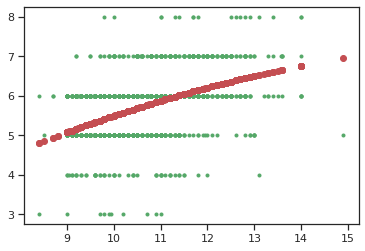

Степени полинома [-0.53568397  0.80902384 -0.02059454] 0.0


<bound method BaseEstimator.__repr__ of Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)>

In [43]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, poly_y_pred, 'ro')
plt.show()
print('Степени полинома', poly_model.named_steps['linear'].coef_, poly_model.named_steps['linear'].intercept_)
poly_model.__repr__

### Оценка качества



In [44]:
def eval_model(y,predicted):
    mae = mean_absolute_error(y, predicted)
    mse = mean_squared_error(y, predicted)
    r2 = r2_score(y, predicted)
    print('MAE ', mae)
    print('MSE ', mse)
    print('R2  ', r2)
    return mae, mse, r2

In [45]:
poly_mae, poly_mse, poly_r2 = eval_model(y_array, poly_y_pred)

MAE  0.5575306279006641
MSE  0.5031885722418864
R2   0.22795483695208807


### 4.2. SVM


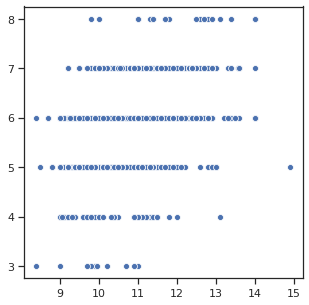

In [46]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=x_array, y=y_array)

In [47]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(x_array.reshape(-1, 1), y_array)
    y_array_pred = clf.predict(x_array.reshape(-1, 1))


### SVR

In [48]:
svr_1 = SVR()
svr_1.fit(X_train_1, y_train_1)

y_pred_1 = svr_1.predict(X_test_1)
svr_1.__repr__

<bound method BaseEstimator.__repr__ of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>

In [49]:
svr_1.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Оценка качества

In [50]:
svr_mae, svr_mse, r2 = eval_model(y_test_1, y_pred_1)

MAE  0.06683563576181
MSE  0.009209786779036003
R2   0.9914914629715852


### 4.3. Дерево решений.



In [51]:
# Обучим дерево на всех признаках 
tree_regr = DecisionTreeRegressor(random_state=1)
tree_regr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
tree_regr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

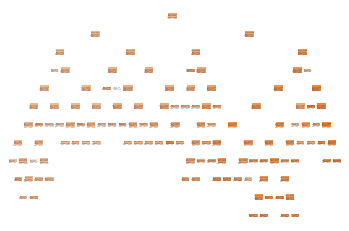

In [52]:
plot_tree(tree_regr, filled=True);

In [53]:
tree_regr_predict = tree_regr.predict(X_test.reshape(-1,1))
tree_regr_predict.shape

(416,)

### Оценка качества

In [54]:
tree_mae, tree_mse, tree_r2 = eval_model(y_test.reshape(-1,1), tree_regr_predict)

MAE  0.5581875124101056
MSE  0.4804395306924174
R2   0.2028098813604967


## 5. Оценка качества моделей с помощью трех подходящих для задачи метрик. Сравнение качества полученных моделей.



In [55]:
print('POLY')
print('mae: {}, mse: {}, r2: {}'.format(poly_mae, poly_mse, poly_r2))
print()
print('SVR')
print('mae: {}, mse: {}, r2: {}'.format(svr_mae, svr_mse, r2))
print()
print('TREE')
print('mae: {}, mse: {}, r2: {}'.format(tree_mae, tree_mse, tree_r2)) 

POLY
mae: 0.5575306279006641, mse: 0.5031885722418864, r2: 0.22795483695208807

SVR
mae: 0.06683563576181, mse: 0.009209786779036003, r2: 0.9914914629715852

TREE
mae: 0.5581875124101056, mse: 0.4804395306924174, r2: 0.2028098813604967


## 6. Подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.


### 6.1 Linear

In [56]:
PolynomialFeatures().get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [57]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [58]:
params = {
    'poly__degree': [ 1, 2, 3]
}

In [59]:
poly_model = Pipeline([('poly', PolynomialFeatures()),
                       ('linear', LinearRegression(fit_intercept=False))])

In [60]:
poly_model.get_params()

{'memory': None,
 'steps': [('poly',
   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                      order='C')),
  ('linear',
   LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False))],
 'verbose': False,
 'poly': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                    order='C'),
 'linear': LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'linear__copy_X': True,
 'linear__fit_intercept': False,
 'linear__n_jobs': None,
 'linear__normalize': False}

In [62]:
%%time
grid_1 = GridSearchCV(estimator=poly_model,
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data, data['quality'])
grid_1.estimator.get_params().keys()

CPU times: user 125 ms, sys: 91.5 ms, total: 216 ms
Wall time: 1.23 s


dict_keys(['memory', 'steps', 'verbose', 'poly', 'linear', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'linear__copy_X', 'linear__fit_intercept', 'linear__n_jobs', 'linear__normalize'])

In [63]:
-grid_1.best_score_, grid_1.best_params_

(4.5607600803463336e-14, {'poly__degree': 1})

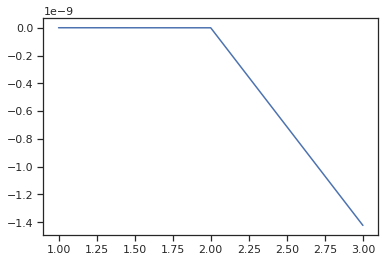

In [64]:
plt.plot(params['poly__degree'], grid_1.cv_results_["mean_test_score"]);

### 6.2 SVR

In [65]:
SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [66]:
params = {
    'epsilon' : [0.2, 0.3, 0.4, 0.5]
}

In [67]:
%%time
grid_1 = GridSearchCV(estimator=SVR(),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data, data['quality'])

CPU times: user 188 ms, sys: 1.95 ms, total: 190 ms
Wall time: 694 ms


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'epsilon': [0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [68]:
-grid_1.best_score_, grid_1.best_params_

(0.4240877573042525, {'epsilon': 0.2})

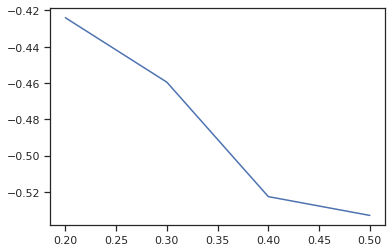

In [70]:
plt.plot(params['epsilon'], grid_1.cv_results_["mean_test_score"]);

In [71]:
# plt.plot(params['cache_size'], grid_1.cv_results_["mean_test_score"]);

### 6.3 Decision tree

In [72]:
DecisionTreeRegressor(random_state=1).get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [73]:
params = {
    'max_depth': [ 8, 9, 10,15],
}

In [75]:
%%time
grid_1 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data, data['quality'])

CPU times: user 54.5 ms, sys: 1.76 ms, total: 56.2 ms
Wall time: 111 ms


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 15]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [76]:
-grid_1.best_score_, grid_1.best_params_

(-0.0, {'max_depth': 8})

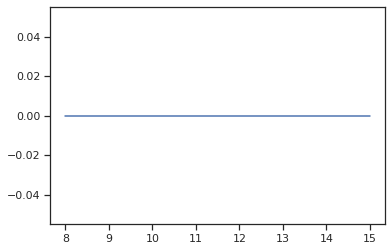

In [77]:
plt.plot(params['max_depth'], grid_1.cv_results_["mean_test_score"]);


## 7. Повтор пункта 4 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством моделей, полученных в пункте 4.

### 7.1 Linear

In [78]:
poly_model = Pipeline([('poly', PolynomialFeatures(degree=1)),
                       ('linear', LinearRegression(fit_intercept=False))])

poly_model.fit(x_array.reshape(-1, 1), y_array)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [79]:
poly_y_pred_gs = poly_model.predict(x_array.reshape(-1, 1))

In [80]:
poly_mae_gs, poly_mse_gs, poly_r2_gs = eval_model(y_array, poly_y_pred)

MAE  0.5575306279006641
MSE  0.5031885722418864
R2   0.22795483695208807


из 4 пункта

In [81]:
print('MAE ', poly_mae)
print('MSE ', poly_mse)
print('R2  ', poly_r2)


MAE  0.5575306279006641
MSE  0.5031885722418864
R2   0.22795483695208807


In [82]:
print('MAE     ',poly_mae_gs - poly_mae)
print('MSE  ',poly_mse_gs - poly_mse)
print('R2      ', poly_r2_gs - poly_r2)

MAE      0.0
MSE   0.0
R2       0.0


При подборе параметров выяснилось, что на данный момент и так установлены оптимальные варианты, модель улучшить не удалось

### 7.2 SVR

In [83]:
svr_1 = SVR(epsilon=0.04)
svr_1.fit(X_train_1, y_train_1)

y_pred_1 = svr_1.predict(X_test_1)

In [84]:
svr_mae_gs, svr_mse_gs, svr_r2_gs = eval_model(y_test_1, y_pred_1)

MAE  0.042268965283935984
MSE  0.005460236396816435
R2   0.9949555158353977


Значения из 4 пункта

In [87]:
print('MAE ', svr_mae)
print('MSE ', svr_mse)
print('R2  ', r2)

MAE  0.06683563576181
MSE  0.009209786779036003
R2   0.9914914629715852


In [90]:
print('MAE     ',svr_mae_gs - svr_mae)
print('Med AE  ',svr_mse_gs - svr_mse)
print('R2      ', svr_r2_gs - r2)

MAE      -0.02456667047787401
Med AE   -0.0037495503822195684
R2       0.0034640528638124612


Модель улучшилась.

### 7.3 Decision tree

In [91]:
tree_regr = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_regr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
tree_regr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

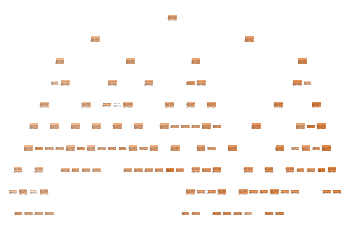

In [92]:
plot_tree(tree_regr, filled=True);

In [93]:
tree_regr_predict = tree_regr.predict(X_test.reshape(-1,1))
tree_regr_predict.shape

(416,)

In [94]:
tree_mae_gs, tree_mse_gs, tree_r2_gs = eval_model(y_test.reshape(-1,1), tree_regr_predict)

MAE  0.5580468148252622
MSE  0.48016261361749746
R2   0.2032693680215769


Из 4 пункта

In [95]:
print('MAE     ',tree_mae)
print('MSE  ',tree_mse)
print('R2      ', tree_r2)

MAE      0.5581875124101056
MSE   0.4804395306924174
R2       0.2028098813604967


In [96]:
print('MAE     ',tree_mae_gs - tree_mae)
print('MSE  ',tree_mse_gs - tree_mse)
print('R2      ', tree_r2_gs - tree_r2)

MAE      -0.00014069758484336337
MSE   -0.00027691707491994677
R2       0.00045948666108019953


Видим, что точность незначительно отличается. 

Еще раз сравним 3 модели:

In [97]:
print('POLY')
print('mae: {}, mse: {}, r2: {}'.format(poly_mae_gs, poly_mse_gs, poly_r2_gs))
print()
print('SVR')
print('mae: {}, mse: {}, r2: {}'.format(svr_mae_gs, svr_mse_gs, svr_r2_gs))
print()
print('TREE')
print('mae: {}, mse: {}, r2: {}'.format(tree_mae_gs, tree_mse_gs, tree_r2_gs)) 

POLY
mae: 0.5575306279006641, mse: 0.5031885722418864, r2: 0.22795483695208807

SVR
mae: 0.042268965283935984, mse: 0.005460236396816435, r2: 0.9949555158353977

TREE
mae: 0.5580468148252622, mse: 0.48016261361749746, r2: 0.2032693680215769


### Вывод:
Лучшую точность дает метод SVR, затем идет линейная модель, худшую точность дает дерево решений.